# Welcome to EDA process

### On Mr. Almeida's Analysis in Python as a Study Case

Please follow it carefully

In [1]:
# Start of importing the dependencies

import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as stm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the sheets on the excel

df_orders = pd.read_excel(r'home365_export_data_del_inv_ord.xlsx', 'Orders')
df_delivery = pd.read_excel(r'home365_export_data_del_inv_ord.xlsx', 'Delivery_lines')
df_invoices = pd.read_excel(r'home365_export_data_del_inv_ord.xlsx', 'Invoices')

,customer_number,order_number,date,amount_net,amount_gross
0,62024,62024002,2017-01-07,325.40,377.46
1,83769,83769002,2017-01-08,1623.10,1882.80
2,103369,103369002,2017-01-08,2955.57,3428.46
3,72909,72909002,2017-01-09,122.36,141.94
4,72609,72609002,2017-01-10,2052.34,2380.72
...,...,...,...,...,...
11383,62724,62724002,2020-12-20,2789.09,3235.35
11384,75494,75494002,2020-12-20,1290.82,1497.35
11385,89514,89514002,2020-12-20,1704.22,1976.90
11386,98054,98054002,2020-12-20,3204.48,3717.20


#### Starting the Data Wrangling and Cleaning

In [ ]:
# Check on if there are null values

'For orders', df_orders.isna().sum(),'For deleivery', df_delivery.isna().sum(), 'For invoices', df_delivery.isna().sum()

('For orders',
 customer_number    0
 order_number       0
 date               0
 number_of_items    0
 total              0
 dtype: int64,
 'For deleivery',
 customer_number     0
 order_id            0
 delivery_id         0
 product_id          0
 date                0
 number_of_pieces    0
 dtype: int64,
 'For invoices',
 customer_number     0
 order_id            0
 delivery_id         0
 product_id          0
 date                0
 number_of_pieces    0
 dtype: int64)

In [14]:
# Check on if there are duplicates

'For orders', df_orders.duplicated().sum(),'For deleivery', df_delivery.duplicated().sum(), 'For invoices', df_delivery.duplicated().sum()

('For orders',
 np.int64(0),
 'For deleivery',
 np.int64(0),
 'For invoices',
 np.int64(0))

In [ ]:
# Observing the data types

'For orders', df_orders.dtypes,'For deleivery', df_delivery.dtypes, 'For invoices', df_delivery.dtypes

('For orders',
 customer_number             int64
 order_number                int64
 date               datetime64[ns]
 number_of_items             int64
 total                     float64
 dtype: object,
 'For deleivery',
 customer_number              int64
 order_id                     int64
 delivery_id                 object
 product_id                   int64
 date                datetime64[ns]
 number_of_pieces             int64
 dtype: object,
 'For invoices',
 customer_number              int64
 order_id                     int64
 delivery_id                 object
 product_id                   int64
 date                datetime64[ns]
 number_of_pieces             int64
 dtype: object)

The present itself as clean

### It is time to answear the questions



##### Task 1: How much revenue did we make each month in 2020 compared to the previous two years?

To answer take we should look into invoices since the ordering is not a indicator of revenue.

In [ ]:
# Taking a look at df

df_invoices

,customer_number,order_number,date,amount_net,amount_gross
0,62024,62024002,2017-01-07,325.40,377.46
1,83769,83769002,2017-01-08,1623.10,1882.80
2,103369,103369002,2017-01-08,2955.57,3428.46
3,72909,72909002,2017-01-09,122.36,141.94
4,72609,72609002,2017-01-10,2052.34,2380.72
...,...,...,...,...,...
11383,62724,62724002,2020-12-20,2789.09,3235.35
11384,75494,75494002,2020-12-20,1290.82,1497.35
11385,89514,89514002,2020-12-20,1704.22,1976.90
11386,98054,98054002,2020-12-20,3204.48,3717.20


In [ ]:
# Grouping by Year

df_task1 = df_invoices.groupby(df_invoices['date'].dt.year)
df_task1.size()

date
2017    2616
2018    2969
2019    2948
2020    2855
dtype: int64

With that we can take a look at the each month and sum it up to compare.

In [39]:
# Now we can visualize the month revenue

revenue_2020 = df_task1.get_group(2020).groupby(df_invoices['date'].dt.month)['amount_gross'].agg('sum')
revenue_2018 = df_task1.get_group(2018).groupby(df_invoices['date'].dt.month)['amount_gross'].agg('sum')
revenue_2019 = df_task1.get_group(2019).groupby(df_invoices['date'].dt.month)['amount_gross'].agg('sum')

print(f'Revenue for 2018: {revenue_2018} \nRevenue for 2019: {revenue_2019} \nRevenue for 2020: {revenue_2020}')

Revenue for 2018: date
1     352585.94
2     323090.38
3     389396.98
4     348901.69
5     364757.41
6     346587.81
7     382288.01
8     391304.33
9     390053.42
10    349977.77
11    394713.32
12    342655.56
Name: amount_gross, dtype: float64 
Revenue for 2019: date
1     364864.97
2     395372.34
3     394313.57
4     418011.43
5     409130.04
6     377449.69
7     397765.10
8     418603.55
9     377536.62
10    342471.99
11    393100.28
12    370376.32
Name: amount_gross, dtype: float64 
Revenue for 2020: date
1     398709.66
2     380669.84
3     379896.94
4     392422.82
5     376513.61
6     415059.30
7     358820.91
8     384835.38
9     328466.42
10    376105.54
11    386775.36
12    222280.63
Name: amount_gross, dtype: float64


Create the data frame with the answer needed.

In [ ]:
# Having the data frame with the answer

df_revenue = pd.DataFrame([revenue_2018, revenue_2019, revenue_2020], index=[2018, 2019, 2020]).T
df_revenue['total_diff_vs2018'] = df_revenue[2020] - df_revenue[2018]
df_revenue['total_diff_vs2019'] = df_revenue[2020] - df_revenue[2019]
df_revenue['percent_change_vs2018'] = round((df_revenue['total_diff_vs2018'] / df_revenue[2018]) * 100, 2)
df_revenue['percent_change_vs2019'] = round((df_revenue['total_diff_vs2019'] / df_revenue[2019]) * 100, 2)
df_revenue


,2018,2019,2020,total_diff_vs2018,total_diff_vs2019,percent_change_vs2018,percent_change_vs2019
date,,,,,,,
1,352585.94,364864.97,398709.66,46123.72,33844.69,13.08,9.28
2,323090.38,395372.34,380669.84,57579.46,-14702.50,17.82,-3.72
3,389396.98,394313.57,379896.94,-9500.04,-14416.63,-2.44,-3.66
4,348901.69,418011.43,392422.82,43521.13,-25588.61,12.47,-6.12
5,364757.41,409130.04,376513.61,11756.20,-32616.43,3.22,-7.97
6,346587.81,377449.69,415059.30,68471.49,37609.61,19.76,9.96
7,382288.01,397765.10,358820.91,-23467.10,-38944.19,-6.14,-9.79
8,391304.33,418603.55,384835.38,-6468.95,-33768.17,-1.65,-8.07
9,390053.42,377536.62,328466.42,-61587.00,-49070.20,-15.79,-13.00


<Axes: xlabel='date', ylabel='percent_change_vs2018'>

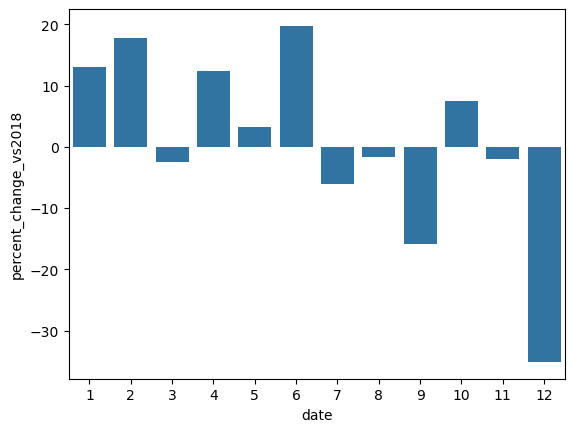

In [ ]:
# 2018 Bar plots

sns.barplot(x=df_revenue.index, y=df_revenue.percent_change_vs2018)

<Axes: xlabel='date', ylabel='percent_change_vs2019'>

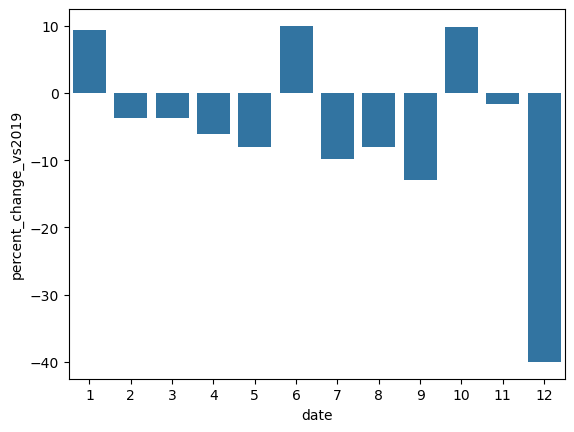

In [116]:
# 2019 Bar plots

sns.barplot(x=df_revenue.index, y=df_revenue.percent_change_vs2019)

We have our answer by month in total value and percent change.

In [118]:
# Exporting

df_revenue.to_excel('data\Task1_Answer.xlsx', 'Task1_Answer')

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\EVSDA\AppData\Local\Temp\ipykernel_20460\4209816534.py:3: SyntaxWarning: invalid escape sequence '\T'
  df_revenue.to_excel('data\Task1_Answer.xlsx', 'Task1_Answer')
C:\Users\EVSDA\AppData\Local\Temp\ipykernel_20460\4209816534.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  df_revenue.to_excel('data\Task1_Answer.xlsx', 'Task1_Answer')


##### Task 2: How many of our orders from 2020 have already been invoiced?

Lets merge each order number from each table...

In [ ]:
# First I get the orders by year

df_task2 = df_orders.groupby(df_orders['date'].dt.year)
df_task1.size()

date
2017    2616
2018    2969
2019    2948
2020    2855
dtype: int64

In [ ]:
# Vizualize them

order_2020 = df_task2.get_group(2020)
rev_2020 = df_task1.get_group(2020)
display(order_2020, rev_2020)

,customer_number,order_number,date,number_of_items,total
8837,84219,84219002,2020-01-01,4,2905.04
8838,54679,54679002,2020-01-02,3,1707.36
8839,73039,73039002,2020-01-02,6,3478.62
8840,74404,74404002,2020-01-02,1,412.34
8841,75584,75584002,2020-01-02,4,2454.16
...,...,...,...,...,...
11822,107809,107809002,2020-12-30,5,1528.15
11823,108254,108254002,2020-12-30,6,2297.64
11824,111094,111094002,2020-12-30,2,332.28
11825,69639,69639002,2020-12-31,5,2512.55


,customer_number,order_number,date,amount_net,amount_gross
8533,60744,60744002,2020-01-01,46.34,53.76
8534,61544,61544002,2020-01-01,3463.25,4017.37
8535,65004,65004002,2020-01-01,900.16,1044.18
8536,90319,90319002,2020-01-01,990.28,1148.72
8537,94329,94329002,2020-01-01,242.16,280.91
...,...,...,...,...,...
11383,62724,62724002,2020-12-20,2789.09,3235.35
11384,75494,75494002,2020-12-20,1290.82,1497.35
11385,89514,89514002,2020-12-20,1704.22,1976.90
11386,98054,98054002,2020-12-20,3204.48,3717.20


In [66]:
# Merging values

invoiced_orders = pd.merge(rev_2020, order_2020, on='order_number')
invoiced_orders

,customer_number_x,order_number,date_x,amount_net,amount_gross,customer_number_y,date_y,number_of_items,total
0,82134,82134002,2020-01-06,85.50,99.18,82134,2020-01-04,6,99.18
1,86774,86774002,2020-01-06,715.22,829.65,86774,2020-01-03,5,829.65
2,105889,105889002,2020-01-10,2227.52,2583.92,105889,2020-01-03,4,2583.92
3,83189,83189002,2020-01-12,2090.72,2425.24,83189,2020-01-08,4,2425.24
4,84529,84529002,2020-01-13,500.59,580.68,84529,2020-01-03,4,580.68
...,...,...,...,...,...,...,...,...,...
2546,62724,62724002,2020-12-20,2789.09,3235.35,62724,2020-11-23,5,3235.35
2547,75494,75494002,2020-12-20,1290.82,1497.35,75494,2020-10-15,5,1497.35
2548,89514,89514002,2020-12-20,1704.22,1976.90,89514,2020-10-16,5,1976.90
2549,98054,98054002,2020-12-20,3204.48,3717.20,98054,2020-10-16,5,3717.20


Making sure the data is clean and answer is correct.

In [61]:
display('Null values:', invoiced_orders.isna().sum(), 'Duplicates:', invoiced_orders.duplicated().sum())

'Null values:'

customer_number_x    0
order_number         0
date_x               0
amount_net           0
amount_gross         0
customer_number_y    0
date_y               0
number_of_items      0
total                0
dtype: int64

'Duplicates:'

np.int64(0)

In [62]:
# Answering printed out

print(f'Total invoiced orders in 2020 is {invoiced_orders.order_number.count()}')

Total invoiced orders in 2020 is 2551


To state it out: Total invoiced orders in 2020 is 2551.

##### Task 3: How many individual products have we shipped that have not been invoiced?

Lets filter the orders not invoiced and sum the number of items.

In [77]:
# Filtering the orders numbers the is not in the invoiced orders.

df_task3 = order_2020[~order_2020['order_number'].isin(invoiced_orders['order_number'].unique())]
df_task3

,customer_number,order_number,date,number_of_items,total
11208,75974,75974002,2020-10-19,3,1046.46
11215,58389,58389002,2020-10-20,7,3889.48
11216,66764,66764002,2020-10-20,5,3573.70
11228,106584,106584002,2020-10-21,1,336.34
11230,82224,82224002,2020-10-22,2,575.62
...,...,...,...,...,...
11822,107809,107809002,2020-12-30,5,1528.15
11823,108254,108254002,2020-12-30,6,2297.64
11824,111094,111094002,2020-12-30,2,332.28
11825,69639,69639002,2020-12-31,5,2512.55


Again is better to make sure the data is clean with the right types after a manipulation.

In [81]:
display('Null values:', df_task3.isna().sum(), 'Duplicates:', df_task3.duplicated().sum(), 'See data types to sum items:', df_task3.dtypes)

'Null values:'

customer_number    0
order_number       0
date               0
number_of_items    0
total              0
dtype: int64

'Duplicates:'

np.int64(0)

'See data types to sum items:'

customer_number             int64
order_number                int64
date               datetime64[ns]
number_of_items             int64
total                     float64
dtype: object

In [79]:
# Adding up all items on the filtered data

print(f'The total products that were ordered who was not invoiced is: {df_task3.number_of_items.sum()}.')

The total products that were ordered who was not invoiced is: 1834.


To state out. The total products that were ordered who was not invoiced is: 1834.

##### Task 4: How many orders have we not yet shipped?

I am assuming that is the products that are being refered to, since the task 2 already covers the orders not skipped, that means invoiced.

In [ ]:
# Geting the orders df since the invoiced_orders has collumns related to invoice

df_task4 = order_2020[order_2020['order_number'].isin(invoiced_orders['order_number'].unique())]
df_task4

,customer_number,order_number,date,number_of_items,total
8837,84219,84219002,2020-01-01,4,2905.04
8838,54679,54679002,2020-01-02,3,1707.36
8839,73039,73039002,2020-01-02,6,3478.62
8840,74404,74404002,2020-01-02,1,412.34
8841,75584,75584002,2020-01-02,4,2454.16
...,...,...,...,...,...
11626,100534,100534002,2020-12-07,2,510.14
11633,86644,86644002,2020-12-08,5,2238.90
11639,67909,67909002,2020-12-09,4,1444.36
11644,110834,110834002,2020-12-09,2,1320.88


Again is better to make sure the data is clean with the right types after a manipulation.

In [107]:

display('Null values:', df_task4.isna().sum(), 'Duplicates:', df_task4.duplicated().sum(), 'See data types to sum items:', df_task4.dtypes)


'Null values:'

customer_number    0
order_number       0
date               0
number_of_items    0
total              0
dtype: int64

'Duplicates:'

np.int64(0)

'See data types to sum items:'

customer_number             int64
order_number                int64
date               datetime64[ns]
number_of_items             int64
total                     float64
dtype: object

In [84]:
# Adding up all items on the filtered data

print(f'The total products out of the {df_task4.number_of_items.count()} orders not skipped, who was invoiced is: {df_task4.number_of_items.sum()}.')

The total products out of the 2551 orders not skipped, who was invoiced is: 10178.


To state out. The total products out of the 2551 orders not skipped, who was invoiced is: 10178.

##### Bonus Task: What was the net sales from June & August 2020 that were invoiced in the following months?

It needs to have to different filters on that verify the June order date and look at greater than June invoicing and one for August with the same logic, so the values in between does not get filter out.

In [106]:
# Quering the right way in sub queries

df_task5 = invoiced_orders[((invoiced_orders['date_y'].dt.month == 6) & (invoiced_orders['date_x'].dt.month > 6)) | (invoiced_orders['date_y'].dt.month == 8) & (invoiced_orders['date_x'].dt.month > 8)]
df_task5

,customer_number_x,order_number,date_x,amount_net,amount_gross,customer_number_y,date_y,number_of_items,total
1180,79574,79574002,2020-07-01,1328.31,1540.84,79574,2020-06-29,7,1540.84
1183,101649,101649002,2020-07-01,339.86,394.24,101649,2020-06-19,4,394.24
1184,66059,66059002,2020-07-02,3529.19,4093.86,66059,2020-06-29,6,4093.86
1191,68044,68044002,2020-07-03,2723.66,3159.45,68044,2020-06-06,7,3159.45
1200,82459,82459002,2020-07-04,1779.59,2064.33,82459,2020-06-09,3,2064.33
...,...,...,...,...,...,...,...,...,...
2150,55854,55854002,2020-11-03,1899.47,2203.38,55854,2020-08-29,6,2203.38
2167,85999,85999002,2020-11-05,934.03,1083.48,85999,2020-08-30,6,1083.48
2168,97534,97534002,2020-11-05,219.21,254.28,97534,2020-08-30,2,254.28
2172,110189,110189002,2020-11-05,609.41,706.92,110189,2020-08-31,1,706.92


Again is better to make sure the data is clean with the right types after a manipulation.


In [108]:

display('Null values:', df_task5.isna().sum(), 'Duplicates:', df_task5.duplicated().sum(), 'See data types to sum items:', df_task5.dtypes)


'Null values:'

customer_number_x    0
order_number         0
date_x               0
amount_net           0
amount_gross         0
customer_number_y    0
date_y               0
number_of_items      0
total                0
dtype: int64

'Duplicates:'

np.int64(0)

'See data types to sum items:'

customer_number_x             int64
order_number                  int64
date_x               datetime64[ns]
amount_net                  float64
amount_gross                float64
customer_number_y             int64
date_y               datetime64[ns]
number_of_items               int64
total                       float64
dtype: object

In [112]:
# Adding up all items on the filtered data

print(f'The total net sales out of the {df_task5.number_of_items.count()} orders in June and August, who was invoiced in the next following months: ${df_task5.amount_net.sum()}')

The total net sales out of the 374 orders in June and August, who was invoiced in the next following months: $509323.53


To state it out. The total net sales out of the 374 orders in June and August, who was invoiced in the next following months: $509323.53